# Menganalisis Risiko Gagal Bayar Peminjam

Tugas pada data ini adalah menyiapkan laporan untuk divisi kredit suatu bank. Saya akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan saya akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Tujuan dan Tahapan](#observation_purpose)
* [Tahap 2. Buka *file* data dan baca informasi umumnya.](#data_preprocessing)
* [Tahap 3. Eksplorasi data](#data_observation)
* [Tahap 4. Transformasi data](#data_preprocessing)
    * [4.1 Memperbaiki nilai yang hilang di `total_income`](#total_income)
    * [4.2 Memperbaiki nilai yang hilang di `days_employed`](#days_employed)
* [Tahap 5. Pengkategorian Data](#data_grouping)
* [Tahap 6. Memeriksa hipotesis](#hypotheses)
* [Kesimpulan](#end)

## Pendahuluan:
Dalam penelitian kali ini, akan menganalisis risiko gagal bayar dari beberapa peminjam yang memiliki beberapa karakteristik sesuai dengan yang disajikan di dalam tabel.
Untuk bisa mendapatkan karakteristik nasabah tersebut, maka akan menguji beberapa hipotesis yang didapat dari dalam tabel.

### Tujuan dan Tahapan:
Tujuan dari pengolahan data kali ini akan menguji tiga hipotesis:
1. Nasabah dengan jumlah anak yang banyak memiliki resiko gagal pinjam sangat tinggi.
2. Nasabah dengan status married akan kesulitan dalam melakukan pembayaran tepat waktu.
3. Tingkat pendapatan yang rendah dari para nasabah akan mengakibatkan nasabah sulit membayar tepat waktu.
4. Tujuan peminjaman dana untuk kebutuhan tempat tinggal akan menyulitkan nasabah untuk membayar tepat waktu.

Data tentang nasabah yang melakukan peminjaman dana disimpan dalam berkas `/datasets/credit_scoring_eng.csv`. Sebelum melakukan uji hipotesis akan dilakukan observasi terhadap data untuk bisa menemukan apakah ada kesalahan dan kekurangan informasi yang ada didalam data tersebut. 

Setelah melakukan observasi dan mendapatakan hal-hal yang perlu diperbaiki, isi data akan dikategorikan berdasarkan beberapa parameter yang dapat membantu untuk menguji apakah hipotesis di awal bisa diterima atau tidak.

[Kembali ke Daftar Isi](#back)

## Buka *file* data dan baca informasi umumnya.

[Mulailah dengan mengimpor *library* dan memuat datanya. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [1]:
# Muat semua *library*
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Muat datanya
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

In [3]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape


(21525, 12)

In [4]:
# Mari tampilkan N baris pertama
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Dari tampilan beberapa baris di awal tabel, terlihat beberapa keaneham seperti ada nilai minus di kolom 'days_employed' dan penggunaan huruf besar yang berbeda di kolom 'education'.

In [5]:
# Dapatkan informasi data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Dari tabel describe di atas, kita bisa melihat persebaran data dari setiap kolom yang ada. Jumlah data sesuai dengan yang kita dapat melalui metode .info. Untuk nilai yang hilang pun jumlahnya sama pada kolom total_income dan days_employed. Serta disini kita juga bisa mengetahui banyak nilai negatif di kolom days_employed dan ada nilai yang aneh di kolom children dan dob_years.

Terdapat dua kolom dimana terdapat nilai yang hilang pada tabel tersebut. Kolom tersebut adalah 'days_employed' dan 'total_income'. Kedua kolom memiliki jumlah nilai yang hilang sebanyak 2174.

In [8]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Nilai yang hilang tampak simetris karena jumlahnya sama untuk kolom 'days_employed' dan 'total income' yaitu sebanyak 2174 nilai yang hilang

In [9]:
# Menerapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
df_clean = df.dropna()

df_clean

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [10]:
total_missing = df['total_income'].isna().sum()

percent_missing = total_missing / len(df) *100

percent_missing

10.099883855981417

Jumlah baris yang hilang sesuai dengan hasil filter tabel untuk nilai yag hilang, sehingga bisa disimpulkan bahwa baris dimana terdapat nilai yang hilang di kolom 'days_employed' juga akan memiliki nilai yang hilang di kolom 'total_income'.

Persentase nilai yang hilang pada tabel adalah sebesar 10.099% dan terbilang tidak cukup besar tetapi mungkin bisa mempengaruhi hasil analisa dari tabel. Karena itu diperlukan untuk mengisi nilai-nilai yang hilang untuk bisa mendapatkan analisa yang baik.

Langkah selanjutnya adalah mengisi nilai yang hilang dengan nilai rata-rata (mean) atau dengan nilai tengah (median) bergantung dari outlier yang terlihat dari tabel.

In [11]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
df_null = df[(df['days_employed'].isna()) & (df['total_income'].isna())].reset_index(drop=True)
print(df_null['income_type'].nunique())
print(df_null['income_type'].unique())
print(df_null['income_type'].value_counts(normalize=True))


5
['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']
employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64


In [12]:
# Periksalah distribusinya
print(df_null['education'].nunique())
print(df_null['education'].unique())
print(df_null['education'].value_counts(normalize=True))

12
['secondary education' "bachelor's degree" 'SECONDARY EDUCATION'
 'some college' 'Secondary Education' 'Some College' "Bachelor's Degree"
 'SOME COLLEGE' 'primary education' "BACHELOR'S DEGREE"
 'Primary Education' 'PRIMARY EDUCATION']
secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
SOME COLLEGE           0.003220
Some College           0.003220
PRIMARY EDUCATION      0.000460
Primary Education      0.000460
Name: education, dtype: float64


In [13]:
print(df_null['family_status'].nunique())
print(df_null['family_status'].unique())
print(df_null['family_status'].value_counts(normalize=True))

5
['civil partnership' 'married' 'unmarried' 'widow / widower' 'divorced']
married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64


Melihat tabel dengan nilai yang hilang hanya diisi oleh beberapa kategori saja jika dibandingkan dengan tabel keseluruhan, dimana nilai yang hilang jika dilihat dari tabel income_type hanya berisi 5 nilai unique, berbeda dengan tabel keseluruhan yang memiliki 8 nilai unique. Nilai yang tidak terdappat pada tabel yang hilang seperti retiree, paternity/maternity leave, dan student. Lalu didapat juga perbedaan pada kolom education, tapi perbedaan belum bisa terlihat secara jelas mengingat nilai pada kolom ini memiliki nilai perbedaan penggunaan huruf yang mengakibatkan adanya duplikasi.

In [14]:
# Memeriksa distribusi di seluruh *dataset*
print(df['income_type'].nunique())
print(df['income_type'].unique())
print(df['income_type'].value_counts(normalize=True))

8
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']
employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64


In [15]:
print(df['education'].nunique())
print(df['education'].unique())
print(df['education'].value_counts(normalize=True))

15
["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']
secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64


In [16]:
print(df['family_status'].nunique())
print(df['family_status'].unique())
print(df['family_status'].value_counts(normalize=True))

5
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64


Dari hasil observasi, untuk nilai yang hilang didominasi oleh income_type employee, sama seperti dengan tabel keseluruhan. Hal yang sama didapat jika melihat kolom family_status dimana keduanya didominasi oleh family_status married.

In [17]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df_null[df_null['income_type']=='employee']['children'].value_counts(normalize=True)

 0     0.589140
 1     0.252489
 2     0.123982
 3     0.026244
 4     0.003620
 20    0.002715
 5     0.000905
-1     0.000905
Name: children, dtype: float64

In [18]:
df[df['income_type']=='employee']['debt'].value_counts(normalize=True)

0    0.904578
1    0.095422
Name: debt, dtype: float64

Nilai yang hilang kemungkinan besar didominasi oleh nasabah dengan status income_type employee dan family_status married

In [19]:
# Periksa pola lainnya
df[df['income_type']=='employee']['family_status'].value_counts(normalize=True)

married              0.583596
civil partnership    0.201187
unmarried            0.134005
divorced             0.056030
widow / widower      0.025182
Name: family_status, dtype: float64

Pola yang terlihat kebanyakan dari nilai yang hilang memang diperoleh dari income_type employee dan family_status married, ini bisa menandakan bahwa nasabah dengan status tersebut paling banyak melakukan kesalahan dalam pengisian data yang mengakibatkan adanya data yang hilang.

Untuk nilai yang hilang akan diisi menggunakan median atau mean dari kolom tersebut sesuai dengan kelompok dari income_type nya. Penentuan dari median atau mean yang akan digunakan bergantung dari outlier yang didapat dalam kolom total_income.

Pada transformasi data akan dilakukan observasi pada nilai-nilai yang ada didalam kolom:
- apakah ada kesalahan pengetikan (huruf besar dan kecil dengan kata yang sama), jika ada maka akan disamakan karakter penulisannya
- nilai yang terlihat aneh(adanya tanda minus pada beberapa kolom), nilai yang minus akan diubah ke positif
- nilai yang hilang pada beberapa kolom akan diisi dengan menggunakan nilai median atau nilai rata-rata dalam kolom tersebut
- duplikat yang terdapat pada tabel akan dihilangkan

## Transformasi data

In [20]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
print(df['education'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [21]:
# Perbaiki pencatatan jika diperlukan
df['education'] = df['education'].str.lower()

Dalam kolom education terdapat beberapa duplikasi kata. Duplikasi disebabkan huruf yang digunakan untuk penulisan tidak seragam, ada yang menggunakan upper case pada penulisannya. Untuk bisa mengatasi hal tersebut, keseluruhan isi didalam kolom education akan diubah menjadi lower case.

In [22]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
print(sorted(df['education'].unique()))
print(sorted(df['family_status'].unique()))
print(sorted(df['income_type'].unique()))
print(sorted(df['gender'].unique()))
print(sorted(df['purpose'].unique()))

["bachelor's degree", 'graduate degree', 'primary education', 'secondary education', 'some college']
['civil partnership', 'divorced', 'married', 'unmarried', 'widow / widower']
['business', 'civil servant', 'employee', 'entrepreneur', 'paternity / maternity leave', 'retiree', 'student', 'unemployed']
['F', 'M', 'XNA']
['building a property', 'building a real estate', 'buy commercial real estate', 'buy real estate', 'buy residential real estate', 'buying a second-hand car', 'buying my own car', 'buying property for renting out', 'car', 'car purchase', 'cars', 'construction of own property', 'education', 'getting an education', 'getting higher education', 'going to university', 'having a wedding', 'housing', 'housing renovation', 'housing transactions', 'profile education', 'property', 'purchase of a car', 'purchase of my own house', 'purchase of the house', 'purchase of the house for my family', 'real estate transactions', 'second-hand car purchase', 'supplementary education', 'to beco

In [23]:
# Mari kita lihat distribusi nilai pada kolom `children`
print(df['children'].unique())


[ 1  0  3  2 -1  4 20  5]


Terdapat nilai -1 pada kolom 'children', yang bisa disebabkan oleh human error ketika proses input data. Pada kasus ini, nilai -1 akan diubah menjadi 1. Selain itu terdapat nilai 20 yang terlihat sangat aneh untuk memiliki anak sebanyak 20, maka nilai 20 akan diganti menjadi 2.

In [24]:
# [perbaiki data berdasarkan keputusan Anda]
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2

In [25]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
print(df['children'].unique())

[1 0 3 2 4 5]


Terdapat nilai - (minus) pada kolom 'days_employed'. Hal ini akan sangat berpengaruh mengingat pada kolom ini juga terdapat nilai yang hilang. Nilai minus ini akan berpengaruh ketika kita akan menentukan mean atau median dari kolom tersebut. Untuk itu nilai minus akan diubah k arah positif/mutlak.

In [26]:
# Temukan data yang bermasalah di `days_employed`
df['days_employed'].describe()

df.loc[df['days_employed'] < 0].count()

children            15906
days_employed       15906
dob_years           15906
education           15906
education_id        15906
family_status       15906
family_status_id    15906
gender              15906
income_type         15906
debt                15906
total_income        15906
purpose             15906
dtype: int64

In [27]:
days_error = df[df['days_employed'] < 0].count()

percent_days_error = days_error / len(df) *100

print(percent_days_error)

children            73.89547
days_employed       73.89547
dob_years           73.89547
education           73.89547
education_id        73.89547
family_status       73.89547
family_status_id    73.89547
gender              73.89547
income_type         73.89547
debt                73.89547
total_income        73.89547
purpose             73.89547
dtype: float64


Data yang error ada 73.72% dari total data, sehingga jika menghapus data akan merusak analisis. Hal yang paling mungkin adalah memperbaiki data, dimana jika dilihat dari distribusinya terdapat nilai - (minus) pada kolom 'days_employed'. Maka dari itu nilai minus akan diubah ke positif agar data dapat diolah lebih lanjut untuk analisis.

In [28]:
# Atasi nilai yang bermasalah
days_employed = df['days_employed']

for days in days_employed:
    if days < 0:
        df['days_employed'] = df['days_employed'].replace(days, days * -1)
        
print(df[df['days_employed'] < 0].count())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


In [29]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

In [30]:
df['dob_years'].describe()

df[df['dob_years'] == 0].count()

children            101
days_employed        91
dob_years           101
education           101
education_id        101
family_status       101
family_status_id    101
gender              101
income_type         101
debt                101
total_income         91
purpose             101
dtype: int64

Dari distribusi terlihat ada nilai 0 untuk 'dob_years'. Ini sangat tidak masuk akal karena tidak mungkin usia dari nasabah adalah 0.

In [31]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df['dob_years'].describe()

dob_error = df[df['dob_years'] == 0].count()

percent_dob_error = dob_error / len(df) *100

print(percent_dob_error)

children            0.469222
days_employed       0.422764
dob_years           0.469222
education           0.469222
education_id        0.469222
family_status       0.469222
family_status_id    0.469222
gender              0.469222
income_type         0.469222
debt                0.469222
total_income        0.422764
purpose             0.469222
dtype: float64


Pada kolom 'dob_years', persentase errornya adalah sebesar 0.47%. Melihat dari kecilnya error, data tersebut bisa saja dihapus agar analisis yang dibuat bisa ebih baik, selain itu bisa juga dengan memberikan nilai mean atau median bergantung pada outlier data yang terlihat.

In [32]:
# Atasi masalah pada kolom `dob_years`
df.loc[df['dob_years'] == 0]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
20462,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


In [33]:
dob_mean = df['dob_years'].mean()
print(dob_mean)

dob_median = df['dob_years'].median()
print(dob_median)

43.29337979094077
42.0


In [34]:
df.loc[df['dob_years'] == 0, 'dob_years'] = dob_median

In [35]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['dob_years'].describe()

count    21525.000000
mean        43.490453
std         12.218595
min         19.000000
25%         34.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [36]:
# Mari kita lihat nilai untuk kolom ini
print(df['family_status'].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


Tidak ada maslah untuk kolom family_status

In [39]:
# Mari kita liat nilai dalam kolom gender
print(df['gender'].unique())

['F' 'M' 'XNA']


In [40]:
# Atasi nilai-nilai yang bermasalah
print(df.loc[df['gender'] == 'XNA'])

       children  days_employed  dob_years     education  education_id  \
10701         0    2358.600502       24.0  some college             2   

           family_status  family_status_id gender income_type  debt  \
10701  civil partnership                 1    XNA    business     0   

       total_income          purpose  
10701     32624.825  buy real estate  


In [41]:
df = df[df['gender'] != 'XNA' ].reset_index(drop=True)

In [42]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
print(df['gender'].unique())

['F' 'M']


In [43]:
# Mari kita lihat nilai dalam kolom income_type
print(df['income_type'].unique())

['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']


Tidak ada masalah pada isi dari kolom income_type.

Duplikat yang ditemukan dalam tabel akan dihilangkan dengan menggunakan metode drop_duplicates() agar data bisa dianalisis dengan baik.

In [46]:
# Periksa duplikat
df.duplicated().sum()


72

In [47]:
# Atasi duplikat
df.drop_duplicates(keep=False, inplace=True)

In [48]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df.duplicated().sum()

0

In [49]:
# Periksa ukuran dataset yang sekarang
print(df.shape)

(21385, 12)


Dataset baru memiliki jumlah baris sebanyak 21385, sedangkan data awal sebanyak 21525. Pda dataset yang baru untuk nilai-nilai pada kolom yang bermasalah sudah diperbaiki mulai dari karakter huruf yang berbeda, nilai yang memiliki tanda negatif, menghilangkan baris yang terdapat hasil 'unindetified', dan pengisian untuk nilai yang hilang. Dataset mengalami perubahan sebesar 0,65% dari dataset awal.

# Bekerja dengan nilai yang hilang

In [50]:
# Temukan dictionary
data = [['days_employed', 66918.065, 2194.218, 24.141633, 401755.400],
       ['dob_years', 43.46, 42, 19, 75],
       ['total_income', 26787.266, 23201.87, 3306.762, 362496.645]]

new_columns = ['column', 'mean', 'median', 'min', 'max']

report = pd.DataFrame(data = data, columns = new_columns)

report.to_dict()

### Memperbaiki nilai yang hilang di `total_income`

In [51]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia

def age_group (dob_years):
    if dob_years < 10:
        return 'children'
    elif 10 <= dob_years <= 19:
        return 'teenager'
    elif 20 <= dob_years <= 64:
        return 'adult'
    return 'retired'
    

In [52]:
# Lakukan pengujian untuk melihat apakah fungsi bekerja atau tidak
print(age_group(9))
print(age_group(19))
print(age_group(20))
print(age_group(65))

children
teenager
adult
retired


In [53]:
# Buatlah kolom baru berdasarkan fungsi
df['age_group'] = df['dob_years'].apply(age_group)


In [54]:
# Periksa bagaimana nilai di dalam kolom baru
df.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [55]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_not_na = df[df['total_income'].notna()].reset_index(drop=True)
df_not_na

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,adult
19346,0,343937.404131,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,retired
19347,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,adult
19348,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,adult


In [56]:
mean_income_grouped = df.groupby('age_group')['total_income'].mean()
median_income_grouped = df.groupby('age_group')['total_income'].median()

print(mean_income_grouped)
print()
print(median_income_grouped)

age_group
adult       27025.800588
retired     21542.650450
teenager    16993.942462
Name: total_income, dtype: float64

age_group
adult       23385.065
retired     18471.391
teenager    14934.901
Name: total_income, dtype: float64


In [57]:
mean_teenager_income = df[df['age_group'] == 'teenager']['total_income'].mean()
mean_adult_income = df[df['age_group'] == 'adult']['total_income'].mean()
mean_retired_income = df[df['age_group'] == 'retired']['total_income'].mean()

median_teenager_income = df[df['age_group'] == 'teenager']['total_income'].median()
median_adult_income = df[df['age_group'] == 'adult']['total_income'].median()
median_retired_income = df[df['age_group'] == 'retired']['total_income'].median()

print('rata-rata income teenager = ', mean_teenager_income)
print('rata-rata income adult = ', mean_adult_income)
print('rata-rata income retired = ', mean_retired_income)
print('median income teenager = ', median_teenager_income)
print('median income adult = ', median_adult_income)
print('median income retired = ', median_retired_income)

rata-rata income teenager =  16993.942461538463
rata-rata income adult =  27025.800587828715
rata-rata income retired =  21542.65044987775
median income teenager =  14934.901000000002
median income adult =  23385.065
median income retired =  18471.391000000003


In [58]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah teridentifikasi
df.groupby('age_group')['total_income'].mean()


age_group
adult       27025.800588
retired     21542.650450
teenager    16993.942462
Name: total_income, dtype: float64

In [59]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah teridentifikasi
df.groupby('age_group')['total_income'].median()

age_group
adult       23385.065
retired     18471.391
teenager    14934.901
Name: total_income, dtype: float64

<AxesSubplot:xlabel='total_income'>

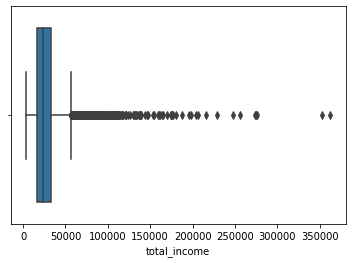

In [60]:
sns.boxplot(df_not_na['total_income'])

Karena dari distribusi datanya terdpat outlier yang sangat besar, nilai yang diambil untuk mengisi nilai yang hilang adalah median dari total_income.

In [61]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe
        

In [62]:
# Memeriksa bagaimana nilai di dalam kolom baru
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [63]:
df = df.reset_index(drop=True)

In [64]:
# Terapkan fungsi tersebut ke setiap baris
df = fill_missing_value (dataframe=df, agg_column='age_group', value_column='total_income')


In [65]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [66]:
# Periksa apakah kita mendapatkan kesalahan
df.isna().sum()

children               0
days_employed       2035
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

In [68]:
# Periksa jumlah entri di kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21385 entries, 0 to 21384
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21385 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21385 non-null  float64
 3   education         21385 non-null  object 
 4   education_id      21385 non-null  int64  
 5   family_status     21385 non-null  object 
 6   family_status_id  21385 non-null  int64  
 7   gender            21385 non-null  object 
 8   income_type       21385 non-null  object 
 9   debt              21385 non-null  int64  
 10  total_income      21385 non-null  float64
 11  purpose           21385 non-null  object 
 12  age_group         21385 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


###  Memperbaiki nilai di `days_employed`

In [69]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
median_days_employed_work = df.groupby('income_type')['days_employed'].median()
median_days_employed_age = df.groupby('age_group')['days_employed'].median()

median_business_day = df[df['income_type'] == 'business']['days_employed'].median()
median_civil_day = df[df['income_type'] == 'civil servant']['days_employed'].median()
median_employee_day = df[df['income_type'] == 'employee']['days_employed'].median()
median_entrepreneur_day = df[df['income_type'] == 'entrepreneur']['days_employed'].median()
median_paternity_day = df[df['income_type'] == 'paternity / maternity leave']['days_employed'].median()
median_retiree_day = df[df['income_type'] == 'retiree']['days_employed'].median()
median_student_day = df[df['income_type'] == 'student']['days_employed'].median()
median_unemployed_day = df[df['income_type'] == 'unemployed']['days_employed'].median()

print(median_days_employed_work)
print()
print(median_days_employed_age)

print('Median days employed untuk business adalah:', median_business_day)
print('Median days employed untuk civil servant adalah:',median_civil_day)
print('Median days employed untuk employee adalah:',median_employee_day)
print('Median days employed untuk entrepreneur adalah:',median_entrepreneur_day)
print('Median days employed untuk paternity/maternity adalah:',median_paternity_day)
print('Median days employed untuk retiree adalah:',median_retiree_day)
print('Median days employed untuk student adalah:',median_student_day)
print('Median days employed untuk unemployed adalah:',median_unemployed_day)

income_type
business                         1546.333214
civil servant                    2689.368353
employee                         1574.202821
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365213.306266
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

age_group
adult         2051.458422
retired     360304.232308
teenager       724.492610
Name: days_employed, dtype: float64
Median days employed untuk business adalah: 1546.3332141566746
Median days employed untuk civil servant adalah: 2689.3683533043886
Median days employed untuk employee adalah: 1574.2028211070854
Median days employed untuk entrepreneur adalah: 520.8480834953765
Median days employed untuk paternity/maternity adalah: 3296.7599620220594
Median days employed untuk retiree adalah: 365213.3062657312
Median days employed untuk student adalah: 578.7515535382181
Median days

In [70]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
mean_days_employed_work = df.groupby('income_type')['days_employed'].mean()
mean_days_employed_age = df.groupby('age_group')['days_employed'].mean()

print(mean_days_employed_work)
print()
print(mean_days_employed_age)


income_type
business                         2111.470404
civil servant                    3399.896902
employee                         2326.499216
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365003.491245
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

age_group
adult        56047.219081
retired     314080.528722
teenager       633.678086
Name: days_employed, dtype: float64


In [71]:
df_days_not_na = df[df['days_employed'].notna()].reset_index(drop=True)

df_days_not_na

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,adult
19346,0,343937.404131,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,retired
19347,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,adult
19348,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,adult


<AxesSubplot:xlabel='days_employed'>

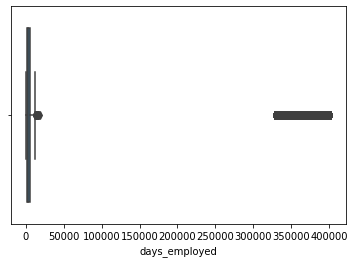

In [72]:
sns.boxplot(df_days_not_na['days_employed'])

Yang akan digunakan untuk mengisi nilai yang hilang adalah median, karena outlier pada days_employed cukup besar.

Untuk fungsi yang digunakan dalam mengisi nilai yang hilang di days_employed, akan digunakan fungsi yang sama seperti pada saat mengisi total_income yang hilang, yaitu fungsi `fill_missing_value`

In [75]:
# Terapkan fungsi ke income_type
df = fill_missing_value (dataframe=df, agg_column='income_type', value_column='days_employed')

In [76]:
# Periksa apakah fungsi Anda bekerja
df.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [78]:
df['days_employed'].describe()

count     21385.000000
mean      66862.289754
std      139033.378265
min          24.141633
25%        1019.604773
50%        1999.778276
75%        5309.423719
max      401755.400475
Name: days_employed, dtype: float64

In [79]:
df = df.round({'days_employed': 0}).reset_index(drop=True)

In [80]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [81]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21385 entries, 0 to 21384
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21385 non-null  int64  
 1   days_employed     21385 non-null  float64
 2   dob_years         21385 non-null  float64
 3   education         21385 non-null  object 
 4   education_id      21385 non-null  int64  
 5   family_status     21385 non-null  object 
 6   family_status_id  21385 non-null  int64  
 7   gender            21385 non-null  object 
 8   income_type       21385 non-null  object 
 9   debt              21385 non-null  int64  
 10  total_income      21385 non-null  float64
 11  purpose           21385 non-null  object 
 12  age_group         21385 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


## Pengkategorian Data

In [82]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.0,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.0,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,153.0,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6930.0,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2189.0,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [83]:
# Tampilkan nilai data yang dipilih untuk pengkategorian
df.groupby('purpose')['purpose'].count()


purpose
building a property                         618
building a real estate                      622
buy commercial real estate                  658
buy real estate                             617
buy residential real estate                 605
buying a second-hand car                    477
buying my own car                           505
buying property for renting out             649
car                                         493
car purchase                                460
cars                                        478
construction of own property                635
education                                   447
getting an education                        441
getting higher education                    426
going to university                         496
having a wedding                            759
housing                                     645
housing renovation                          604
housing transactions                        651
profile education               

In [84]:
# Periksa nilai unik
sorted(df['purpose'].unique())

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

Kelompok utama yang teridentifikasi berdasarkan nilai uniknya adalah pada kolom 'purpose' yang mana terbagi menjadi 4 kategori yaitu property real estate, cars, education, dan wedding.

In [85]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
    if 'car' in row:
        return 'car'
    elif 'hous' in row or 'prop' in row or 'real est' in row:
        return 'real estate'
    elif 'wedd' in row:
        return 'wedding'
    elif 'educ' in row or 'uni' in row:
        return 'education'
    else:
        return 'Unidentified'

In [86]:
# Buat kolom yang memuat kategori dan hitung nilainya
df['category'] = df['purpose'].apply(categorize_purpose)
print(df.groupby('category')['category'].count())


category
car             4297
education       4004
real estate    10783
wedding         2301
Name: category, dtype: int64


In [87]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
print(df.groupby('age_group')['total_income'].mean())
print(df['total_income'].mean())

age_group
adult       26677.353801
retired     21287.859868
teenager    16846.868071
Name: total_income, dtype: float64
26446.114362450317


In [88]:
# Dapatkan kesimpulan statistik untuk kolomnya
df['total_income'].describe()

count     21385.000000
mean      26446.114362
std       15710.202614
min        3306.762000
25%       17188.530000
50%       23385.065000
75%       31368.208000
max      362496.645000
Name: total_income, dtype: float64

Rentang yang akan digunakan adalah rata-rata dari total_income untuk mengelompokkan kategori pendapatan berdasarkan total_income dari para nasabah.

In [89]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def rate_income (total_income):
    if total_income < 21000:
        return 'low'
    elif 21000 <= total_income <= 31000:
        return 'average'
    return 'high'


In [90]:
# Buat kolom yang memuat kategori
df['rate_income'] = df['total_income'].apply(rate_income)

In [91]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df.groupby('rate_income')['total_income'].count()

rate_income
average    7725
high       5500
low        8160
Name: total_income, dtype: int64

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [92]:
# Periksa data anak dan data pelunasan tepat waktu

# Hitung gagal bayar berdasarkan jumlah anak
pivot_table_children = df.pivot_table(index='children', columns= 'debt', values='days_employed', aggfunc='count')
print(pivot_table_children)



debt            0       1
children                 
0         12972.0  1063.0
1          4400.0   445.0
2          1923.0   202.0
3           303.0    27.0
4            37.0     4.0
5             9.0     NaN


**Kesimpulan**

Dari hasil diatas untuk kemungkinan gagal bayar banyak dialami oleh nasabah yang memiliki 1 anak, nilainya terus menurun jika dilihat secara berurutan dari jumlah anak terbanyak. Dari hal ini hipotesis kita untuk jumlah anak semakin banyak mengakibatkan nasabah gagal membayar tepat waktu adalah salah, hasil yang didapat sebaliknya dengan hipotesis awal

**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [93]:
# Periksa data status keluarga dan pelunasan tepat waktu

# Hitung gagal bayar berdasarkan status keluarga
pivot_table_family = df.pivot_table(index='family_status', columns= 'debt', values='days_employed', aggfunc='count')
print(pivot_table_family)


debt                   0    1
family_status                
civil partnership   3737  388
divorced            1110   85
married            11369  931
unmarried           2533  274
widow / widower      895   63


**Kesimpulan**

Nasabah yang gagal membayar tepat waktu paling banyak adalah yang memiliki family_status married, dan paling sedikit adalah widow/widower. Hasil ini juga sesuai dengan hipotesis di awal bahwa nasabah dengan family_status married akan sulit membayar tepat waktu

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [94]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu

# Hitung gagal bayar berdasarkan tingkat pendapatan
pivot_table_rate = df.pivot_table(index='rate_income', columns= 'debt', values='days_employed', aggfunc='count')
print(pivot_table_rate)


debt            0    1
rate_income           
average      7041  684
high         5104  396
low          7499  661


**Kesimpulan**

Sesuai dengan pengkategorian tingkat pendapatan, untuk nasabah yang berada pada tingkat average income paling banyak gagal membayar tepat waktu, diikuti oleh low income dengan selisih yang tidak begitu jauh, dan paling sedikit adalah kategori high income. Hasil ini tidak sesuai dengan hipotesis kita, walaupun hasil yang didapat antara jumlah nasabah dengan low income dan average sangatlah sedikit.

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [95]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan

pivot_table_purpose = df.pivot_table(index='category', columns= 'debt', values='days_employed', aggfunc='count')
print(pivot_table_purpose)


debt             0    1
category               
car           3894  403
education     3634  370
real estate  10001  782
wedding       2115  186


**Kesimpulan**

Kebanyakan nasabah yang gagal membayar tepat waktu memiliki tujuan ke arah real estate dan yang paling sedikit adalah untuk pernikahan. Hasil ini sesuai dengan hipotesis di awal, nasabah dengan tujuan peminjaman untuk tempat tinggal memiliki resiko gagal bayar tepat waktu.

# Kesimpulan umum 

Kesimpulan yang didapat dari file credit_scoring_eng adalah ada beberapa yang data yang nilainya hilang pada kolom days_employed, total_income, dan dob_years. Selain itu penulisan yang tidak seragam pada kolom education, nilai yang bermasalah pada kolom days_employed, dan adanya duplikasi data. 

Permasalahan tersebut diatasi dengan menyamakan ukuran karakter huruf pada kolom yang nilainya berbeda, mengisi nilai yang hilang menggunakan median dari nilai yang terdapat pada kolom nilai yang hilang, menghapus data yang 'unidentified', dan menghapus duplikat yang terdeteksi pada tabel.

Setelah memperbaiki semua permasalahan yang ada, nasabah yang memiliki potensi gagal bayar adalah nasabah yang mengajukan peminjaman untuk kategori real estate, nasabah yang memiliki rate_income average, nasabah yang family_status married, atau nasabah yang memiliki jumlah anak 1. 